# COVID-19 Projection

In [1]:
# library importing
import pandas as pd
import numpy as np
import nltk
import string
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
us = pd.read_csv("../data/time_series_covid19_confirmed_US.csv")
gb = pd.read_csv("../data/time_series_covid19_confirmed_global.csv")

In [3]:
print(us.shape)
print(gb.shape)

(3340, 326)
(271, 319)


In [4]:
print(us.columns[:10])
us.head()

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_'],
      dtype='object')


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,2617,2634,2661,2686,2704,2716,2735,2751,2780,2818
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,8199,8269,8376,8473,8576,8603,8733,8820,8890,9051
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,1160,1161,1167,1170,1170,1171,1173,1175,1178,1189
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,1136,1142,1157,1162,1170,1173,1179,1188,1196,1204
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,2754,2763,2822,2855,2879,2888,2922,2946,2997,3061


In [5]:
print(gb.columns[:10])
gb.head()

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20'],
      dtype='object')


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,44706,44988,45280,45490,45716,45839,45966,46215,46498,46717
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,32761,33556,34300,34944,35600,36245,36790,37625,38182,39014
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,74862,75867,77000,78025,79110,80168,81212,82221,83199,84152
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,6256,6304,6351,6428,6534,6610,6610,6712,6745,6790
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,14493,14634,14742,14821,14920,15008,15087,15103,15139,15251


In [6]:
def create_time_series(df, index):
    ts = pd.DataFrame()

    date_index = 4
    if df.shape[1] == 326:
        date_index = 11

    dates = pd.Series(df.columns[date_index:])
    values = np.array(df.iloc[index, date_index:], dtype=int)
    ts["dates"] = dates
    ts["values"] = values
    ts = ts.set_index("dates")
    return ts
us_ts = create_time_series(us, 4)
us_ts[-10:]

,values
dates,
11/22/20,2754
11/23/20,2763
11/24/20,2822
11/25/20,2855
11/26/20,2879
11/27/20,2888
11/28/20,2922
11/29/20,2946
11/30/20,2997


In [7]:
print(us["Country_Region"].unique())
print("\n", us["Province_State"].unique())
print("\nNumber of States =", us["Province_State"].unique().shape[0])

['US']

 ['Alabama' 'Alaska' 'American Samoa' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'Diamond Princess'
 'District of Columbia' 'Florida' 'Georgia' 'Grand Princess' 'Guam'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Northern Mariana Islands' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Puerto Rico' 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee'
 'Texas' 'Utah' 'Vermont' 'Virgin Islands' 'Virginia' 'Washington'
 'West Virginia' 'Wisconsin' 'Wyoming']

Number of States = 58


In [8]:
print(gb["Country/Region"].unique())

print("\nNumber of Countries =", gb["Country/Region"].unique().shape[0])

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo (Brazzaville)'
 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Diamond Princess' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Holy See'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jo

In [9]:
def get_index(df, name):
    col = "Country/Region"
    if df.shape[1] == 326:
        col = "Province_State"
    return df[df[col] == name].iloc[0].name

In [10]:
print("Mississippi Index =", get_index(us, "Mississippi"))
print("US Index =", get_index(gb, "US"))

Mississippi Index = 1456
US Index = 246


In [11]:
sweden_index = get_index(gb, "Sweden")
sweden = create_time_series(gb, sweden_index)
sweden.head()

,values
dates,
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0


(315,)


Text(0.5, 0, 'Dates')

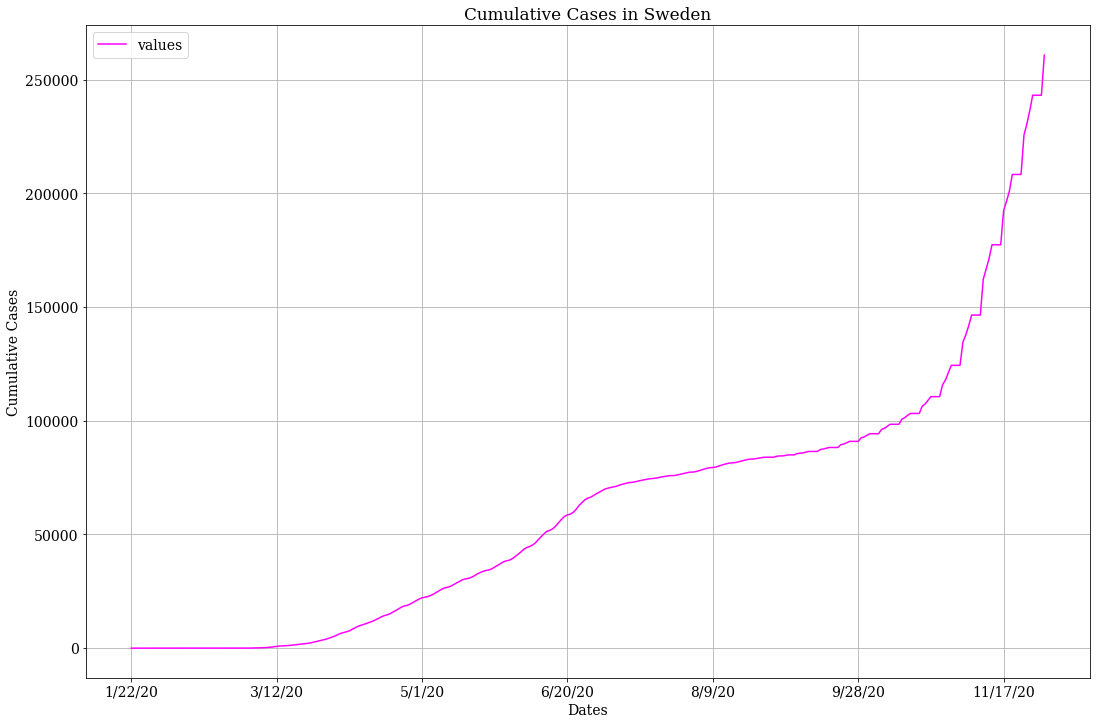

In [48]:
print(sweden["values"].shape)
sweden.plot(figsize=(18, 12), color="magenta")
font = {'font.family' : 'serif',
        'font.size'   : 14,
        'font.weight' : 'normal'}
plt.title("Cumulative Cases in Sweden")
plt.grid(True)
plt.rcParams.update(font)
plt.ylabel("Cumulative Cases")
plt.xlabel("Dates")

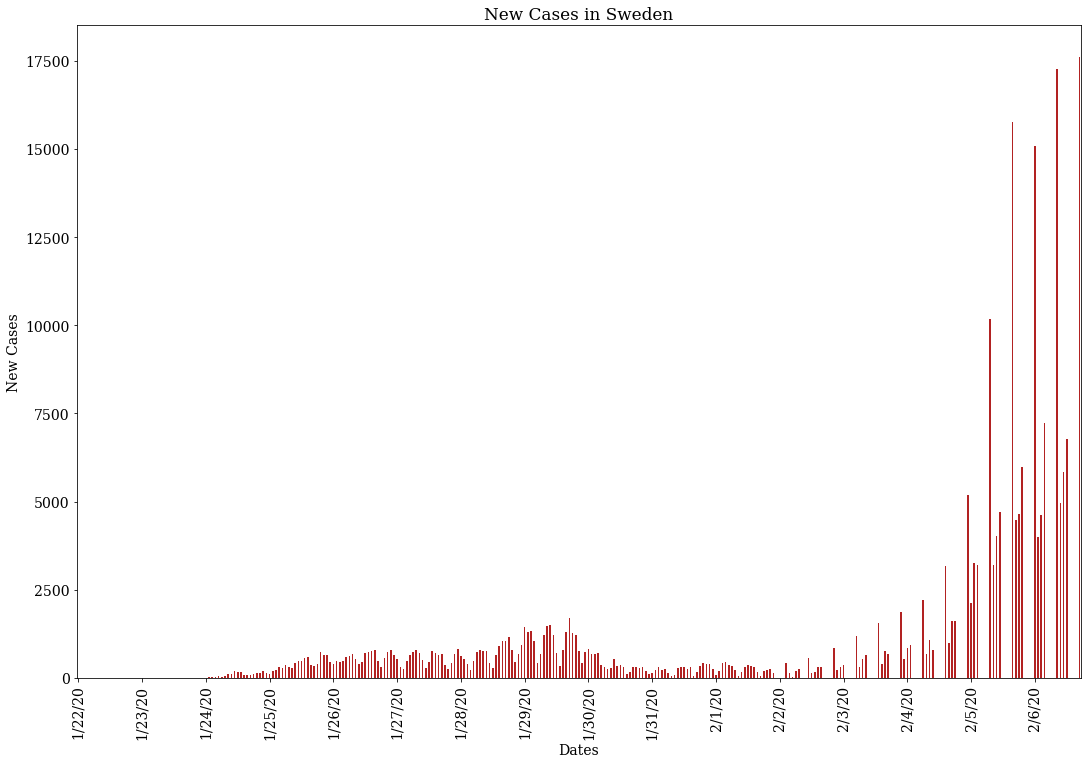

In [50]:
ax = sweden.diff(axis=0).plot(kind='bar', figsize=(18, 12), color="firebrick")
font = {'font.family' : 'serif',
        'font.size'   : 14,
        'font.weight' : 'normal'}
plt.title("New Cases in Sweden")
plt.rcParams.update(font)
ax.get_legend().remove()
plt.ylabel("New Cases")
plt.xlabel("Dates")
ax.set_xticks(np.arange(0, sweden.shape[0], 20))

In [14]:
gb.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,44706,44988,45280,45490,45716,45839,45966,46215,46498,46717
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,32761,33556,34300,34944,35600,36245,36790,37625,38182,39014
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,74862,75867,77000,78025,79110,80168,81212,82221,83199,84152
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,6256,6304,6351,6428,6534,6610,6610,6712,6745,6790
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,14493,14634,14742,14821,14920,15008,15087,15103,15139,15251


In [15]:
print(gb[gb["Country/Region"] == "Canada"]["Province/State"])

39                      Alberta
40             British Columbia
41             Diamond Princess
42               Grand Princess
43                     Manitoba
44                New Brunswick
45    Newfoundland and Labrador
46        Northwest Territories
47                  Nova Scotia
48                      Nunavut
49                      Ontario
50         Prince Edward Island
51                       Quebec
52       Repatriated Travellers
53                 Saskatchewan
54                        Yukon
Name: Province/State, dtype: object


# COVID-19 Analysis
## British Columbia
I was born and raised in Vancouver, BC. My entire family currently resides in BC. As such, I will restrict my analysis to the impact of COVID-19 on the province of British Columbia. Prior to breaking into an analysis of BC, I will begin by illustrating the impact of COVID-19 on Canada as a whole. 

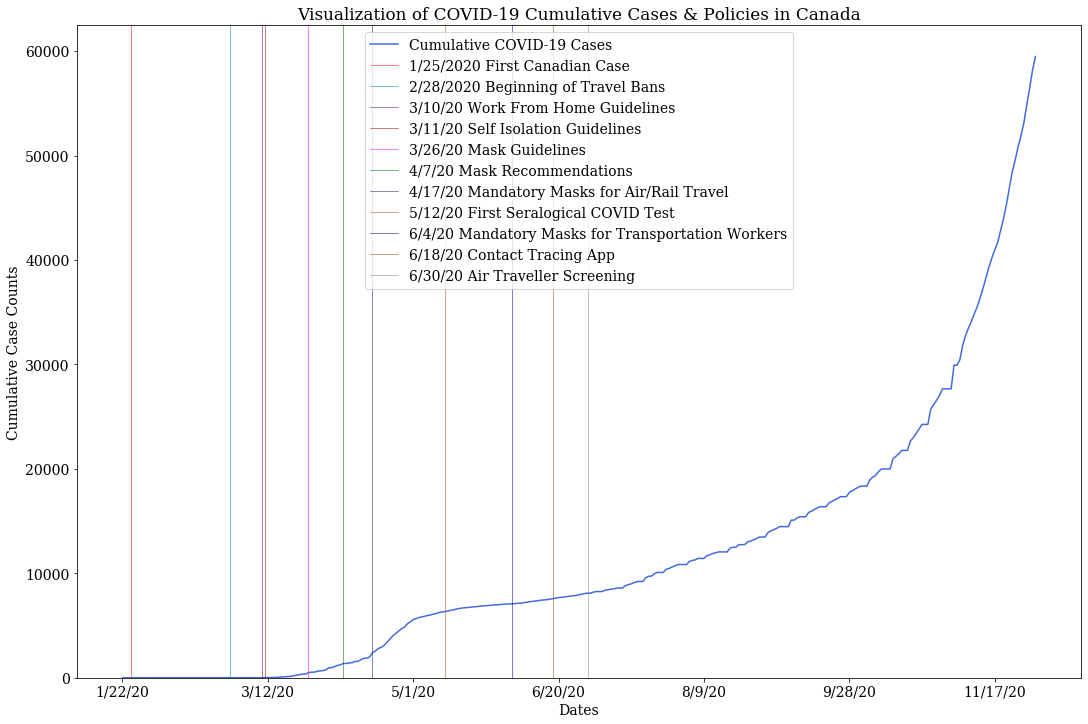

In [32]:
canada = create_time_series(gb, get_index(gb, "Canada"))
ax = canada.plot(figsize=(18, 12), color="royalblue")
font = {'font.family' : 'serif',
        'font.size'   : 14,
        'font.weight' : 'normal'}

plt.rcParams.update(font)
plt.title("Visualization of COVID-19 Cumulative Cases & Policies in Canada")
plt.xlabel("Dates")
plt.ylabel("Cumulative Case Counts")
plt.ylim(bottom=0)
plt.legend()
plt.grid(False)

# Critical Events: https://www.canadianhealthcarenetwork.ca/covid-19-a-canadian-timeline, https://www.cihi.ca/en/covid-19-intervention-timeline-in-canada 
canada = canada.reset_index()
# First case of COVID-19 in Canada
fc_date = "1/25/20"
fc_line = ax.axvline(x=canada[canada["dates"] == fc_date].index[0], color="red", linewidth=0.5)

# Beginning of Travel Bans
tb_date = "2/28/20"
tb_line = ax.axvline(x=canada[canada["dates"] == tb_date].index[0], color="darkcyan", linewidth=0.5)

# Work from home policies
wfh_date = "3/10/20"
wfh_line = ax.axvline(x=canada[canada["dates"] == wfh_date].index[0], color="indigo", linewidth=0.5)

# Self isolation guidelines
si_date = "3/11/20"
si_line = ax.axvline(x=canada[canada["dates"] == si_date].index[0], color="darkred", linewidth=0.5)

# Mask guidelines
mg_date = "3/26/20"
mg_line = ax.axvline(x=canada[canada["dates"] == mg_date].index[0], color="magenta", linewidth=0.5)

# Mask recommendation
mr_date = "4/7/20"
mr_line = ax.axvline(x=canada[canada["dates"] == mr_date].index[0], color="darkgreen", linewidth=0.5)

# Mandatory masks for air travel
mma_date = "4/17/20"
mma_line = ax.axvline(x=canada[canada["dates"] == mma_date].index[0], color="midnightblue", linewidth=0.5)

# First serological COVID test
st_date = "5/12/20"
st_line = ax.axvline(x=canada[canada["dates"] == st_date].index[0], color="sienna", linewidth=0.5)

# Mandatory masks for transportation sector workers
mmt_date = "6/4/20"
mmt_line = ax.axvline(x=canada[canada["dates"] == mmt_date].index[0], color="darkblue", linewidth=0.5)

# National contact tracing app
nct_date = "6/18/20"
nct_line = ax.axvline(x=canada[canada["dates"] == nct_date].index[0], color="saddlebrown", linewidth=0.5)

# Air traveller screening
ats_date = "6/30/20"
ats_line = ax.axvline(x=canada[canada["dates"] == ats_date].index[0], color="slategray", linewidth=0.5)

plt.legend(["Cumulative COVID-19 Cases", "1/25/2020 First Canadian Case", "2/28/2020 Beginning of Travel Bans", "3/10/20 Work From Home Guidelines", "3/11/20 Self Isolation Guidelines", "3/26/20 Mask Guidelines", "4/7/20 Mask Recommendations", "4/17/20 Mandatory Masks for Air/Rail Travel", "5/12/20 First Seralogical COVID Test", "6/4/20 Mandatory Masks for Transportation Workers", "6/18/20 Contact Tracing App", "6/30/20 Air Traveller Screening"])

plt.show()

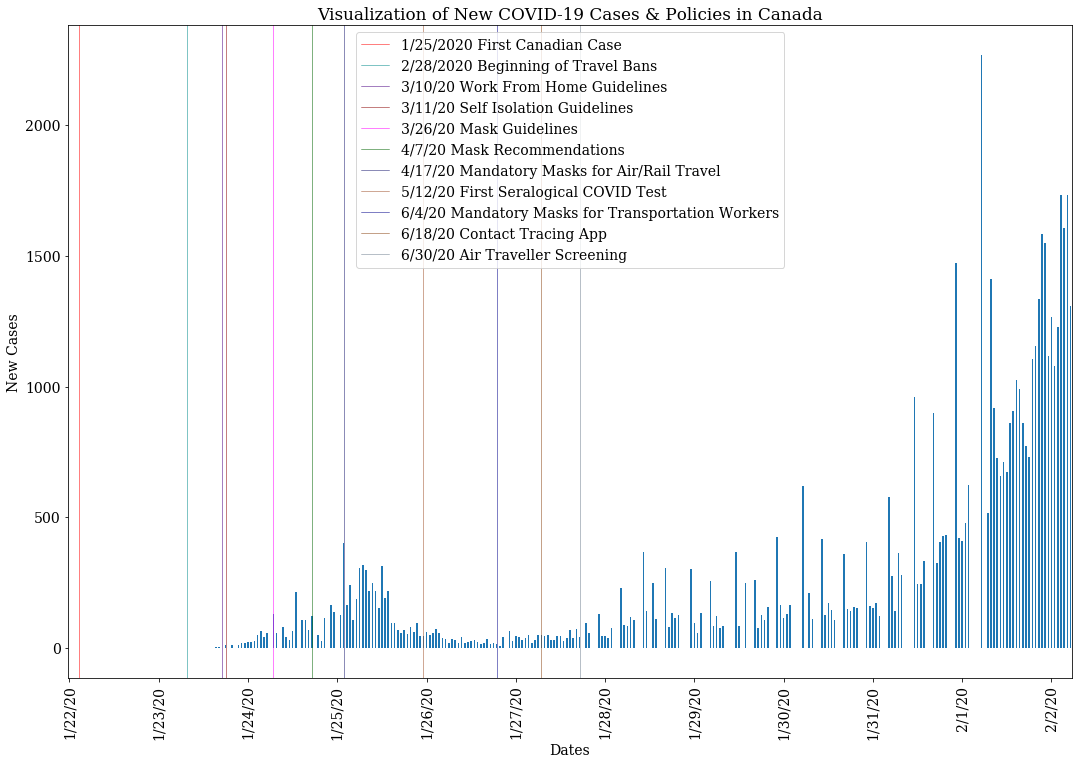

In [33]:
canada = create_time_series(gb, get_index(gb, "Canada"))
ax = canada.diff(axis=0).plot(kind="bar", figsize=(18, 12))
font = {'font.family' : 'serif',
        'font.size'   : 14,
        'font.weight' : 'normal'}

plt.rcParams.update(font)
plt.title("Visualization of New COVID-19 Cases & Policies in Canada")
plt.xlabel("Dates")
plt.ylabel("New Cases")
plt.legend()
ax.set_xticks(np.arange(0, canada.shape[0], 28))
plt.grid(False)

canada = canada.reset_index()

# First case of COVID-19 in Canada
fc_date = "1/25/20"
fc_line = ax.axvline(x=canada[canada["dates"] == fc_date].index[0], color="red", linewidth=0.5)

# Beginning of Travel Bans
tb_date = "2/28/20"
tb_line = ax.axvline(x=canada[canada["dates"] == tb_date].index[0], color="darkcyan", linewidth=0.5)

# Work from home policies
wfh_date = "3/10/20"
wfh_line = ax.axvline(x=canada[canada["dates"] == wfh_date].index[0], color="indigo", linewidth=0.5)

# Self isolation guidelines
si_date = "3/11/20"
si_line = ax.axvline(x=canada[canada["dates"] == si_date].index[0], color="darkred", linewidth=0.5)

# Mask guidelines
mg_date = "3/26/20"
mg_line = ax.axvline(x=canada[canada["dates"] == mg_date].index[0], color="magenta", linewidth=0.5)

# Mask recommendation
mr_date = "4/7/20"
mr_line = ax.axvline(x=canada[canada["dates"] == mr_date].index[0], color="darkgreen", linewidth=0.5)

# Mandatory masks for air travel
mma_date = "4/17/20"
mma_line = ax.axvline(x=canada[canada["dates"] == mma_date].index[0], color="midnightblue", linewidth=0.5)

# First serological COVID test
st_date = "5/12/20"
st_line = ax.axvline(x=canada[canada["dates"] == st_date].index[0], color="sienna", linewidth=0.5)

# Mandatory masks for transportation sector workers
mmt_date = "6/4/20"
mmt_line = ax.axvline(x=canada[canada["dates"] == mmt_date].index[0], color="darkblue", linewidth=0.5)

# National contact tracing app
nct_date = "6/18/20"
nct_line = ax.axvline(x=canada[canada["dates"] == nct_date].index[0], color="saddlebrown", linewidth=0.5)

# Air traveller screening
ats_date = "6/30/20"
ats_line = ax.axvline(x=canada[canada["dates"] == ats_date].index[0], color="slategray", linewidth=0.5)

plt.legend(["1/25/2020 First Canadian Case", "2/28/2020 Beginning of Travel Bans", "3/10/20 Work From Home Guidelines", "3/11/20 Self Isolation Guidelines", "3/26/20 Mask Guidelines", "4/7/20 Mask Recommendations", "4/17/20 Mandatory Masks for Air/Rail Travel", "5/12/20 First Seralogical COVID Test", "6/4/20 Mandatory Masks for Transportation Workers", "6/18/20 Contact Tracing App", "6/30/20 Air Traveller Screening"])

plt.show()

In [70]:
bc = gb[gb["Province/State"] == "British Columbia"].iloc[:, 4:].transpose()
bc.rename(columns={40:"values"}, inplace=True)
bc.head()

,values
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0


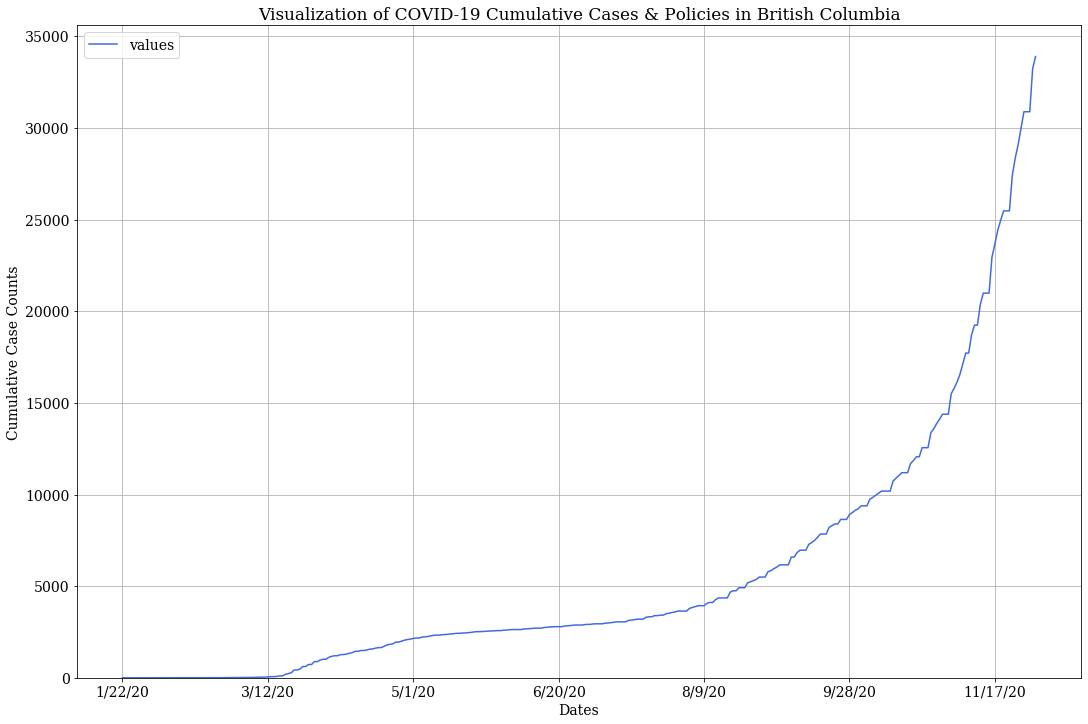

In [72]:
ax = bc.plot(figsize=(18, 12), color="royalblue")
font = {'font.family' : 'serif',
        'font.size'   : 14,
        'font.weight' : 'normal'}

plt.rcParams.update(font)
plt.title("Visualization of COVID-19 Cumulative Cases & Policies in British Columbia")
plt.xlabel("Dates")
plt.ylabel("Cumulative Case Counts")
plt.ylim(bottom=0)
plt.legend()
plt.grid(True)

In [73]:
log_bc = log(bc)

NameError: name 'log' is not defined

# Model Selection
Options: 
- SIR Model
- ARIMA 
- Optimization
- MC Simulation

